# Data Wrangling in Python
Author : Ejaz ur Rehman\
Date: 2025-02-09\
Email: ijazfinance@gmail.com

Data Wrangling (also known as Data Munging) is the process of cleaning, transforming, and organizing raw data into a structured and usable format for analysis. It involves handling missing values, removing duplicates, correcting inconsistencies, and converting data into a format suitable for data analytics or machine learning.

**Key Steps in Data Wrangling**
1. Data Collection – Gathering raw data from various sources (databases, APIs, spreadsheets, etc.).
2. Data Cleaning – Removing errors, handling missing values, and correcting inconsistencies.
3. Data Transformation – Converting data types, normalizing, aggregating, and restructuring data.
4. Data Enrichment – Combining multiple datasets to enhance data quality.
5. Data Validation – Ensuring the data is accurate, complete, and formatted correctly.
6. Data Exporting – Storing the wrangled data in a database or format suitable for analysis.

**Why is Data Wrangling Important?**
* Improves Data Quality – Ensures accuracy and consistency in data.
* Enhances Decision-Making – Clean, structured data leads to better insights.
* Saves Time – Automates data preparation for analysts and data scientists.
* Optimizes Machine Learning Models – Well-prepared data improves model performance.

**Common Data Wrangling Tools**
* Python (Pandas, NumPy)
* R (dplyr, tidyr)
* SQL
* Excel & Power Query
* ETL Tools (Talend, Alteryx)

## 1. Import Liabraries

In [220]:
# importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [221]:
# laod the data
df = sns.load_dataset ('titanic')

## 3. Data Checking

In [222]:
df.head ()
    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [223]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 4. Finding the Missing Values

In [224]:
# find the missing values in the data in terms of percentage
df.isnull ().sum() / len (df) *100  

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64


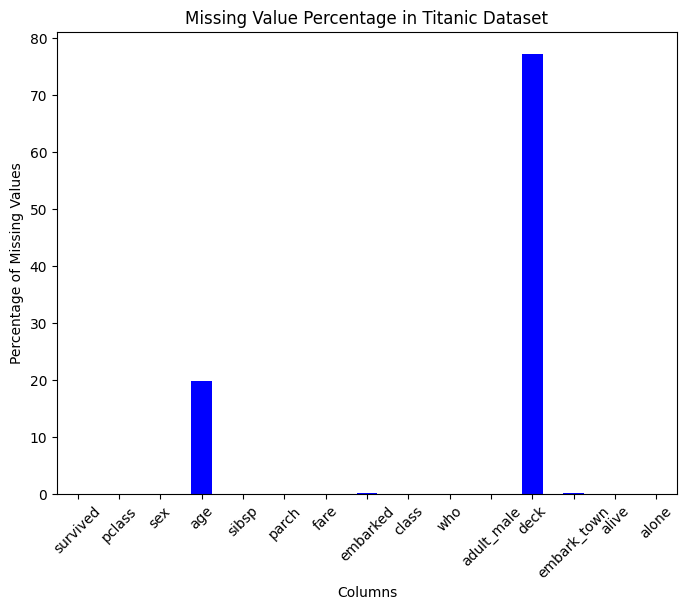

In [225]:
# Calculate missing value percentage
missing_percentage = round((df.isnull().sum() / len(df)) * 100, 2)
# Display missing value percentages
print(missing_percentage)
# Visualize missing value percentages
missing_percentage.plot(kind='bar', figsize=(8, 6), color='blue')
plt.title('Missing Value Percentage in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.show()

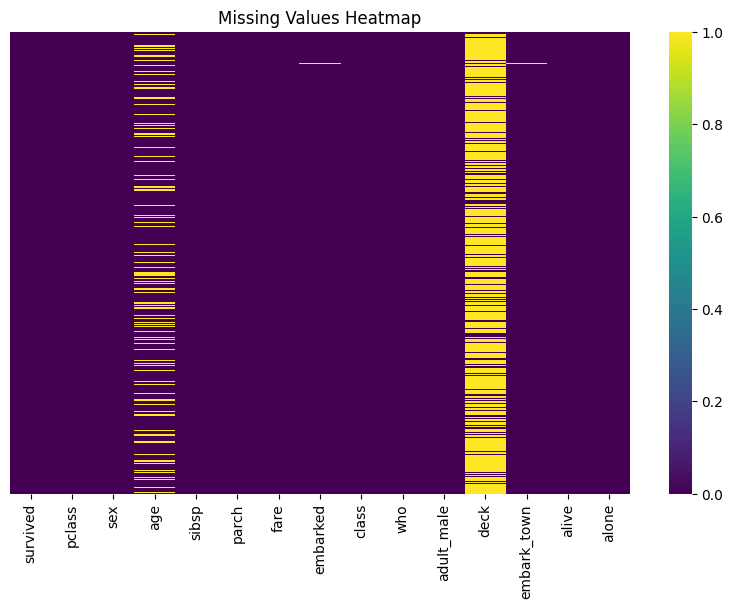

In [226]:
# Create a heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## 5. Handling of Missing Values

##### 5.1 Age Column (Numeric Data)

In [227]:
# Fill missing values in 'Age' with the median
df['age'].fillna(df['age'].median(), inplace=True)
# Verify
print(df['age'].isnull().sum())  # Should output 0


0


C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\3592394097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


##### 5.2 Embarked Column (Categorical Data)

In [228]:
# Fill missing values in 'Embarked' with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Verify
print(df['embarked'].isnull().sum())  # Should output 0

0


C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\3074649823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


##### 5.3 Embarked Town Column (Categorical Data)

In [229]:
# Fill missing values in 'Embarked' with the mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Verify
print(df['embark_town'].isnull().sum())  # Should output 0

0


C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\2918571484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


##### 5.4 Deck Column (Categorical Data)

In [230]:
# Drop the 'deck' column
df.drop('deck', axis=1, inplace=True)

# Verify
print('deck' in df.columns)  # Should output False

False


In [231]:
# Check for missing values again
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [232]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


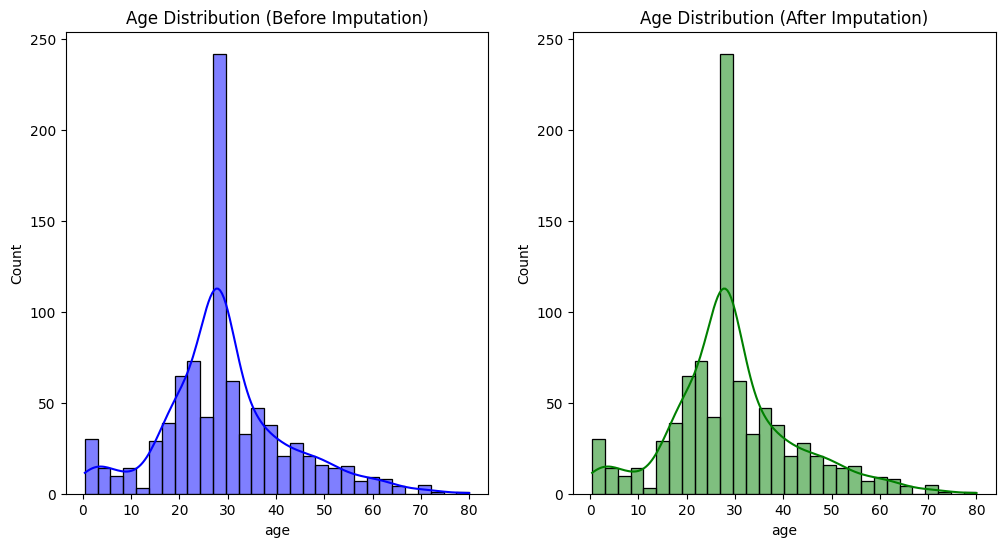

In [233]:
# Plot the distribution of 'Age' before and after filling missing values
plt.figure(figsize=(12, 6))

# Before handling missing values
plt.subplot(1, 2, 1)
sns.histplot(df['age'].dropna(), kde=True, color='blue')
plt.title('Age Distribution (Before Imputation)')

# After handling missing values
plt.subplot(1, 2, 2)
sns.histplot(df['age'], kde=True, color='green')
plt.title('Age Distribution (After Imputation)')

plt.show()

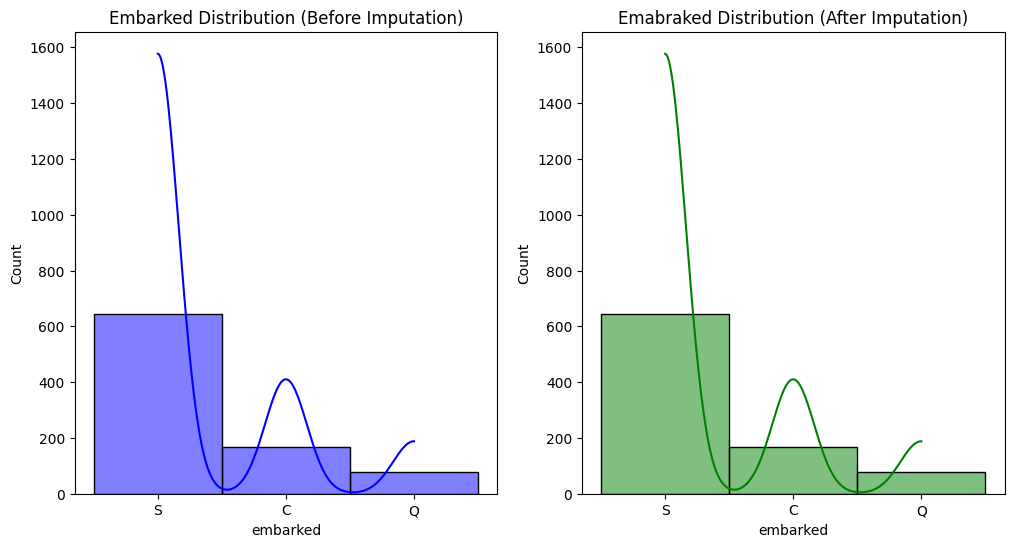

In [234]:
# Plot the distribution of 'Emabarked' before and after filling missing values
plt.figure(figsize=(12, 6))

# Before handling missing values
plt.subplot(1, 2, 1)
sns.histplot(df['embarked'].dropna(), kde=True, color='blue')
plt.title('Embarked Distribution (Before Imputation)')

# After handling missing values
plt.subplot(1, 2, 2)
sns.histplot(df['embarked'], kde=True, color='green')
plt.title('Emabraked Distribution (After Imputation)')

plt.show()

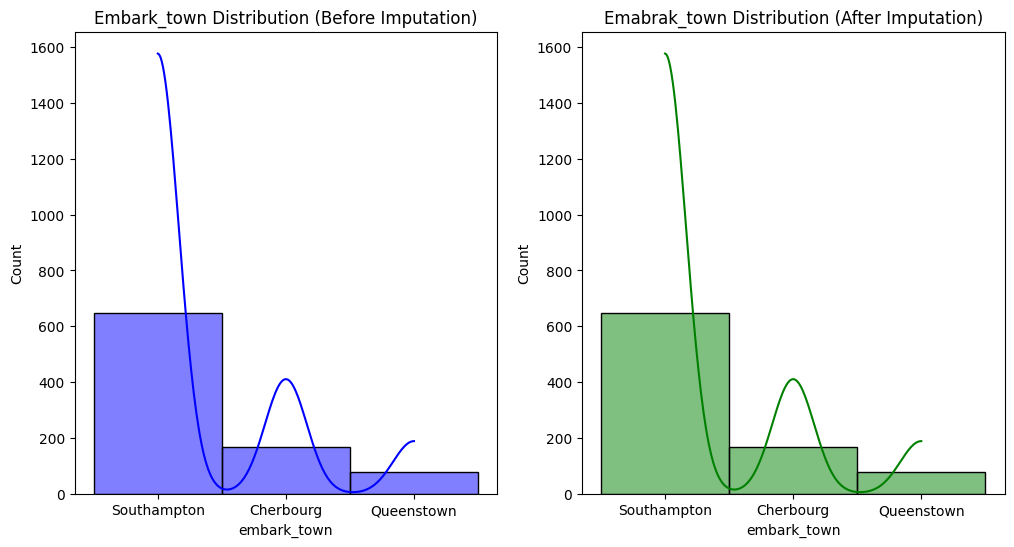

In [235]:
# Plot the distribution of 'Emabarked' before and after filling missing values
plt.figure(figsize=(12, 6))

# Before handling missing values
plt.subplot(1, 2, 1)
sns.histplot(df['embark_town'].dropna(), kde=True, color='blue')
plt.title('Embark_town Distribution (Before Imputation)')

# After handling missing values
plt.subplot(1, 2, 2)
sns.histplot(df['embark_town'], kde=True, color='green')
plt.title('Emabrak_town Distribution (After Imputation)')

plt.show()

In [236]:
# Save the cleaned dataset to a new CSV file
df.to_csv('titanic_cleaned.csv', index=False)

## 6. Duplitcate Values & its Handling

#### 6.1 Checking for the Duplicate Values

In [237]:
# Check for Duplicate values
# Find duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female  28.0      0      0   7.7500        Q   Third   
55          1       1    male  28.0      0      0  35.5000        S   First   
76          0       3    male  28.0      0      0   7.8958        S   Third   
77          0       3    male  28.0      0      0   8.0500        S   Third   
87          0       3    male  28.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male  28.0      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male  embark_town alive  alone  


#### 6.2 Count the Duplicate Values

In [238]:
# count the duplicate
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 116


#### 6.3 Check Duplicates for Specific Columns

In [239]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [240]:
duplicates_by_column = df[df.duplicated(subset=['age', 'parch'])]
print(duplicates_by_column)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
4           0       3    male  35.0      0      0   8.0500        S   Third   
14          0       3  female  14.0      0      0   7.8542        S   Third   
16          0       3    male   2.0      4      1  29.1250        Q   Third   
17          1       2    male  28.0      0      0  13.0000        S  Second   
19          1       3  female  28.0      0      0   7.2250        C   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  28.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  


#### 6.4 Check duplicate for each column

In [241]:
# Identify duplicate values in each column
duplicate_columns = df.apply(lambda col: col.duplicated().sum())

# Show columns that have duplicates
print(duplicate_columns[duplicate_columns > 0])


survived       889
pclass         888
sex            889
age            803
sibsp          884
parch          884
fare           643
embarked       888
class          888
who            888
adult_male     889
embark_town    888
alive          889
alone          889
dtype: int64


#### 6.5 Highlighting the duplicate values

In [242]:
# Find duplicate rows (excluding the first occurrence)
duplicate_rows = df[df.duplicated(keep=False)]

# Compare duplicate rows with the original ones
duplicate_highlight = duplicate_rows.apply(lambda col: col.duplicated(keep=False))

# Show the DataFrame highlighting duplicate values
print(duplicate_highlight)


     survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
4        True    True  True  True   True   True  True      True   True  True   
23       True    True  True  True   True   True  True      True   True  True   
26       True    True  True  True   True   True  True      True   True  True   
28       True    True  True  True   True   True  True      True   True  True   
29       True    True  True  True   True   True  True      True   True  True   
..        ...     ...   ...   ...    ...    ...   ...       ...    ...   ...   
870      True    True  True  True   True   True  True      True   True  True   
877      True    True  True  True   True   True  True      True   True  True   
878      True    True  True  True   True   True  True      True   True  True   
884      True    True  True  True   True   True  True      True   True  True   
886      True    True  True  True   True   True  True      True   True  True   

     adult_male  embark_town  alive  al

In [243]:
def highlight_duplicates(s):
    return ['background-color: yellow' if s.duplicated(keep=False).any() else '' for _ in s]

# Apply the function to highlight duplicates
df.style.apply(highlight_duplicates, axis=0)


In [244]:
pip install Jinja2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [245]:
df_cleaned = df.drop_duplicates()
print(df_cleaned.shape)  # Check new shape of the dataset


(775, 14)


In [246]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

#### 6.6 Remove duplicate values from each column

In [247]:
df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 
    'embark_town', 'alive', 'alone']] = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 
    'embark_town', 'alive', 'alone']].drop_duplicates()


In [248]:
df_cleaned = df_cleaned.reset_index(drop=True)


In [249]:
df = df.drop_duplicates()
print(df.shape)  # Check if duplicates were removed


(776, 14)


#### 6.7 Final count the duplicate

In [250]:
# count the duplicate
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [251]:
df_cleaned.to_csv("duplicate_cleaned_titanic.csv", index=False)


In [252]:
df_cleaned = pd.read_csv("duplicate_cleaned_titanic.csv")


In [253]:
# count the duplicate
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [254]:
# find the missing values in the data in terms of percentage
df.isnull ().sum() / len (df) * 100

survived       0.128866
pclass         0.128866
sex            0.128866
age            0.128866
sibsp          0.128866
parch          0.128866
fare           0.128866
embarked       0.128866
class          0.128866
who            0.128866
adult_male     0.128866
embark_town    0.128866
alive          0.128866
alone          0.128866
dtype: float64

In [255]:
print(df.isnull().sum())  # Shows count of missing values per column


survived       1
pclass         1
sex            1
age            1
sibsp          1
parch          1
fare           1
embarked       1
class          1
who            1
adult_male     1
embark_town    1
alive          1
alone          1
dtype: int64


In [256]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)


    survived  pclass  sex  age  sibsp  parch  fare embarked class  who  \
47       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   

   adult_male embark_town alive alone  
47        NaN         NaN   NaN   NaN  


In [257]:
df_cleaned = df.dropna()


In [258]:
print(df.isnull().sum())  # Should return all zeros if fixed


survived       1
pclass         1
sex            1
age            1
sibsp          1
parch          1
fare           1
embarked       1
class          1
who            1
adult_male     1
embark_town    1
alive          1
alone          1
dtype: int64


In [259]:
# Identify the Row with Missing Values
missing_row = df[df.isnull().any(axis=1)]
print(missing_row)

    survived  pclass  sex  age  sibsp  parch  fare embarked class  who  \
47       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   

   adult_male embark_town alive alone  
47        NaN         NaN   NaN   NaN  


In [260]:
# Check if the Row is Corrupt
df_cleaned = df.dropna()

In [261]:
# Fill Missing Values Instead of Dropping
# Fill Numeric Columns (age, fare, etc.)
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Fill Categorical Columns (sex, embarked, class, etc.)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['class'].fillna(df['class'].mode()[0], inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\1007616183.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\1007616183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\DELL\AppData

In [262]:
# Verify If Missing Values Are Fixed
print(df.isnull().sum())  # Should return all zeros if fixed

survived       1
pclass         1
sex            0
age            0
sibsp          1
parch          1
fare           0
embarked       0
class          0
who            1
adult_male     1
embark_town    1
alive          1
alone          1
dtype: int64


In [263]:
print(df[df.isnull().any(axis=1)])

    survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
47       NaN     NaN  male  28.0    NaN    NaN  15.9        S  Third  NaN   

   adult_male embark_town alive alone  
47        NaN         NaN   NaN   NaN  


In [264]:
df['sibsp'].fillna(df['sibsp'].median(), inplace=True)
df['parch'].fillna(df['parch'].median(), inplace=True)
df['who'].fillna(df['who'].mode()[0], inplace=True)
df['adult_male'].fillna(df['adult_male'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['alive'].fillna(df['alive'].mode()[0], inplace=True)
df['alone'].fillna(df['alone'].mode()[0], inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\4238700280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sibsp'].fillna(df['sibsp'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\4238700280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sibsp'].fillna(df['sibsp'].median(), inplace=True)
C:\Users\DELL

In [265]:
print(df.isnull().sum())  # Should return all zeros


survived       1
pclass         1
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [266]:
print(df[df.isnull().any(axis=1)])

    survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
47       NaN     NaN  male  28.0    0.0    0.0  15.9        S  Third  man   

    adult_male  embark_town alive  alone  
47        True  Southampton    no   True  


In [267]:
df['sibsp'].fillna(df['sibsp'].median(), inplace=True)
df['parch'].fillna(df['parch'].median(), inplace=True)
df['who'].fillna(df['who'].mode()[0], inplace=True)
df['adult_male'].fillna(df['adult_male'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['alive'].fillna(df['alive'].mode()[0], inplace=True)
df['alone'].fillna(df['alone'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\4125104895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sibsp'].fillna(df['sibsp'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\4125104895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sibsp'].fillna(df['sibsp'].median(), inplace=True)
C:\Users\DELL

In [268]:
print(df.isnull().sum())  # Should return all zeros

survived       1
pclass         1
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [269]:
df = pd.read_csv("duplicate_cleaned_titanic.csv", na_values=["", " ", "NA", "None"])


In [270]:
print(df.columns)  # Ensure column names are clean

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [271]:
df.dropna(inplace=True)

In [272]:
print(df.isnull().sum())  # Should return all zeros

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [273]:
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

Missing values:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
Duplicate rows: 0


In [274]:
print(f"Duplicate rows: {df.duplicated().sum()}")  # Should return 0 if no duplicates


Duplicate rows: 0


In [275]:
df.to_csv("final_cleaned_titanic.csv", index=False)

## 7. Outliers & its Handling

- Theere are three methods to handal outliers:
  - Visualization
  - IQR Method
  - Z-Score

### 7.1 Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\1833225593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=titanic, palette="Set2")


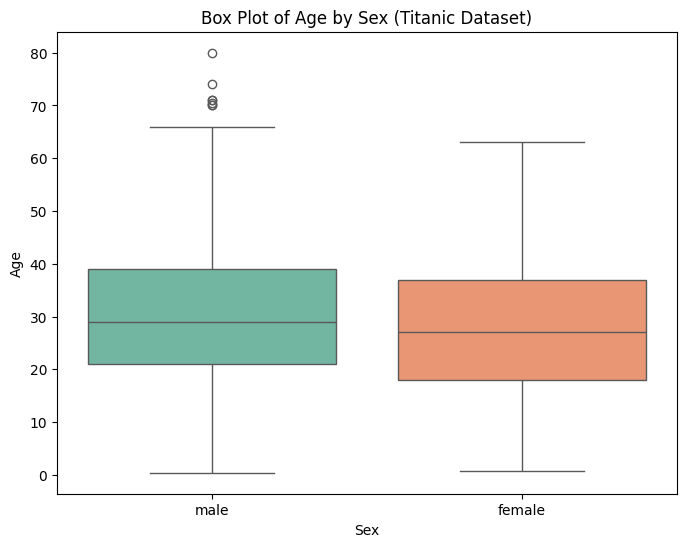

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Create Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='age', data=titanic, palette="Set2")

# Add Title and Labels
plt.title('Box Plot of Age by Sex (Titanic Dataset)')
plt.xlabel('Sex')
plt.ylabel('Age')

# Show Plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\981365551.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=titanic_filtered, palette="Set2")


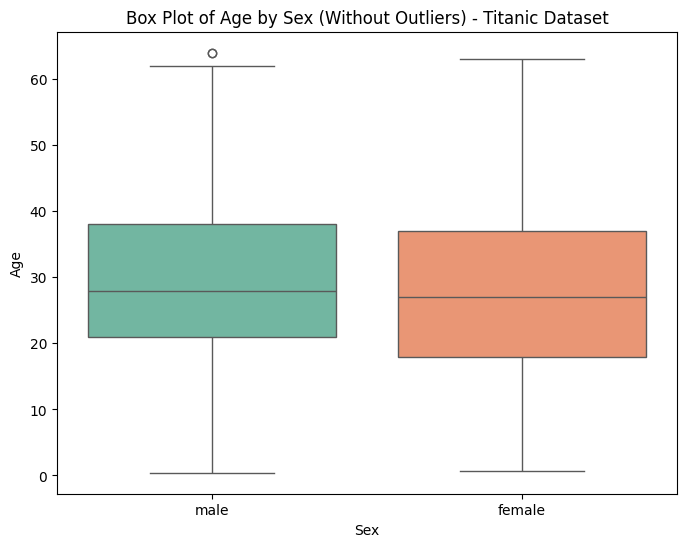

In [277]:
# Remove Outliers and Plot Boxplot for age

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows where Age is NaN
titanic = titanic.dropna(subset=['age'])

# Compute Q1, Q3, and IQR
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset (Remove Outliers)
titanic_filtered = titanic[(titanic['age'] >= lower_bound) & (titanic['age'] <= upper_bound)]

# Plot Box Plot after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='age', data=titanic_filtered, palette="Set2")

# Add Title and Labels
plt.title('Box Plot of Age by Sex (Without Outliers) - Titanic Dataset')
plt.xlabel('Sex')
plt.ylabel('Age')

# Show Plot
plt.show()


In [278]:
df.shape

(775, 14)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2620\426743654.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='fare', data=titanic_filtered, palette="Set3")


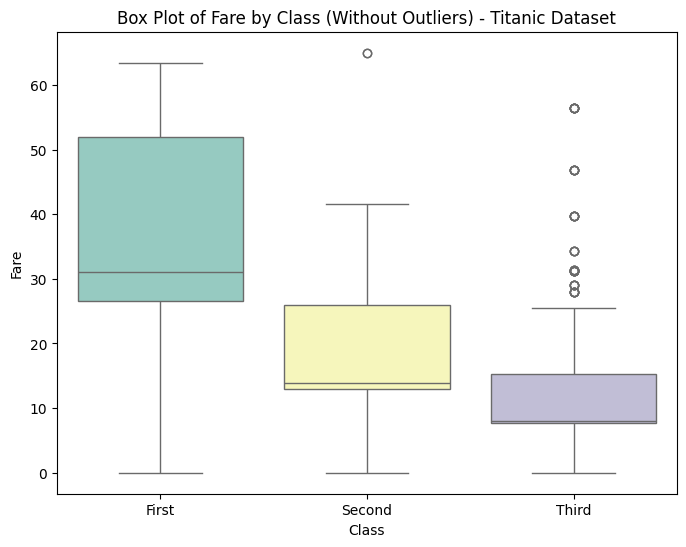

In [279]:
# Remove Outliers from Fare and Plot Boxplot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows where Fare is NaN
titanic = titanic.dropna(subset=['fare'])

# Compute Q1, Q3, and IQR for Fare
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset (Remove Outliers)
titanic_filtered = titanic[(titanic['fare'] >= lower_bound) & (titanic['fare'] <= upper_bound)]

# Plot Box Plot of Fare by Class (Without Outliers)
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='fare', data=titanic_filtered, palette="Set3")

# Add Title and Labels
plt.title('Box Plot of Fare by Class (Without Outliers) - Titanic Dataset')
plt.xlabel('Class')
plt.ylabel('Fare')

# Show Plot
plt.show()


In [280]:
df.shape

(775, 14)

## 8.Data Transformation

### 8.1 Data Normalization
- There are following methods for normalization:
  - Min-Max Normalization
  - Standard Scaler
  - Winsorization
  - Z-socre Normalization
  - Decimal scaling
  - Log Transformation

In [281]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [282]:
# apply Min-Max Scaler

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# get the data
df

# select colum to normalize
cols_to_normalize = ['age', 'fare']

# create the scaler funciton / tool
scaler = MinMaxScaler()

# fit and transform the data on scaler 
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data
df



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,Southampton,no,False
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0,3,female,0.484795,0,5,0.056848,Q,Third,woman,False,Queenstown,no,False
771,1,1,female,0.233476,0,0,0.058556,S,First,woman,False,Southampton,yes,True
772,0,3,female,0.346569,1,2,0.045771,S,Third,woman,False,Southampton,no,False
773,1,1,male,0.321438,0,0,0.058556,C,First,man,True,Cherbourg,yes,True


In [283]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,0.366439,0.529032,0.420645,0.068078
std,0.492674,0.853574,0.172988,0.990326,0.840565,0.102295
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.258608,0.000000,0.000000,0.015713
50%,0.000000,3.000000,0.346569,0.000000,0.000000,0.031035
75%,1.000000,3.000000,0.447097,1.000000,1.000000,0.066750
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


In [134]:
# apply Standard Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler

# get the data
df

# select colum to normalize
cols_to_normalize = ['age', 'fare']

# create the scaler funciton / tool
scaler = StandardScaler()

# fit and transform the data on scaler 
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.551060,1,0,-0.527515,S,Third,man,True,Southampton,no,False
1,1,1,female,0.611945,1,0,0.695086,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.260308,0,0,-0.514627,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.393881,1,0,0.347909,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.393881,0,0,-0.512240,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0,3,female,0.684632,0,5,-0.109851,Q,Third,woman,False,Queenstown,no,False
771,1,1,female,-0.769123,0,0,-0.093144,S,First,woman,False,Southampton,yes,True
772,0,3,female,-0.114933,1,2,-0.218205,S,Third,woman,False,Southampton,no,False
773,1,1,male,-0.260308,0,0,-0.093144,C,First,man,True,Cherbourg,yes,True


In [135]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,775.000000,775.000000,7.750000e+02,775.000000,775.000000,7.750000e+02
mean,0.412903,2.246452,2.521281e-16,0.529032,0.420645,-1.134576e-16
std,0.492674,0.853574,1.000646e+00,0.990326,0.840565,1.000646e+00
min,0.000000,1.000000,-2.119661e+00,0.000000,0.000000,-6.659405e-01
25%,0.000000,1.000000,-6.237473e-01,0.000000,0.000000,-5.122402e-01
50%,0.000000,3.000000,-1.149330e-01,0.000000,0.000000,-3.623586e-01
75%,1.000000,3.000000,4.665691e-01,1.000000,1.000000,-1.299298e-02
max,1.000000,3.000000,3.664831e+00,8.000000,6.000000,9.116066e+00


In [198]:
# apply log Transofromation

ship = sns.load_dataset('titanic')

In [199]:
ship.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [200]:
import numpy as np
ship['age'] = ship['age'].fillna(ship['age'].median())
ship['fare'] = ship['fare'].fillna(ship['fare'].median())

# log transformation
ship['age'] = np.log(ship['age'])
ship['fare'] = np.log(ship['fare'])
ship.head()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

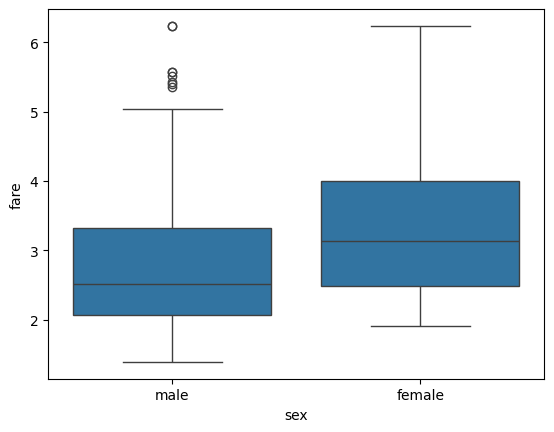

In [203]:
sns.boxplot(data=ship, x='sex', y='fare')

## 9. Data Organization

In [284]:
df['family_size'] = df['sibsp'] + df['parch']


In [285]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,Southampton,no,False,1
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,Southampton,no,True,0


<Axes: xlabel='family_size', ylabel='Count'>

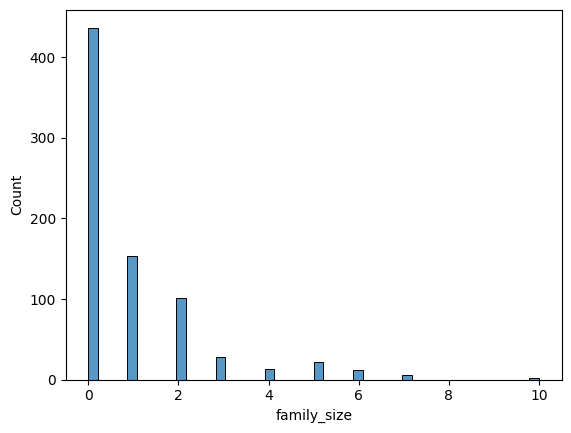

In [213]:
sns.histplot(df['family_size'])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


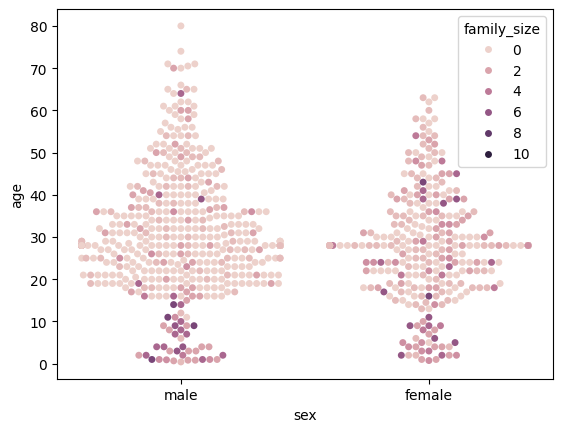

In [214]:
sns.swarmplot(data=df, x='sex', y='age', hue='family_size')

In [215]:
# change column name
df = df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [219]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Create pivot table for survival rates by passenger class (Pclass)
pivot_table = titanic.pivot_table(index='pclass', values='fare', aggfunc='mean')

# Display the pivot table
print(pivot_table)


             fare
pclass           
1       84.154687
2       20.662183
3       13.675550


## 10. Save Wrangled Data

In [287]:
# saving wragnled data
df.to_csv("titanic_preprocess_data.csv")